In [1]:
'''
---------------------------------------------------------------
Simulation for Function-on-Function Linear Regression
---------------------------------------------------------------
* 1 d

* 1 Response Y & 1 Predictor X   

* Sparse (num of grid: 21)

* Training samp size: 200
  Test     samp size: 100

* Using Gaussian Kernal Function in LPR

* Using Leave-One-Curve-Out CV for bandwidth selection in LPR 
---------------------------------------------------------------
'''

#####

import GetData
import FFReg
import Plotting
import lpr

###
import numpy as np

In [2]:
# ---------
# Settings
# ---------
# sim_rep_time = 500

tran_samp_size = 200
test_samp_size = 100
samp_size = tran_samp_size + test_samp_size
range_num_pts = np.array([2, 6])
num_pts = range_num_pts[1]


In [3]:
# -------------
# Setting of X
# -------------
def X_Mean_Func(s):
    #input, output: vector
    return(s /  + 2 * np.sin(s))


def Eigen_Funcs_X(s):
    #input  :d-vector
    #output:array with dim (2 * d)
    return(np.array([np.sqrt(2 / 5) * -np.cos(2 * np.pi * s / 5), 
                     np.sqrt(2 / 5) *  np.sin(2 * np.pi * s / 5),
                     np.sqrt(2 / 5) * -np.cos(4 * np.pi * s / 5)]))

num_grid_X = 21
range_X = np.array([0, 5])

X_eigen_val = np.array([9, 4, 1])


In [4]:
# -------------
# Setting of Y
# -------------

def Y_Mean_Func(s):
    #input, output: vector
    return(s / 2 + np.sin(s))

def Eigen_Funcs_Y(s):
    #input  :d-vector
    #output:array with dim (2 * d)
    return(np.array([np.sqrt(2 / 5) * -np.cos(np.pi * s / 5), 
                     np.sqrt(2 / 5) * np.sin(np.pi * s / 5),
                     np.sqrt(2 / 5) * -np.cos(2 * np.pi * s / 5)])) 

num_grid_Y = 21

range_Y = np.array([0, 5])

B = np.array([[1, 0.8, 0.8], [-1, 0.5, -0.5],[0.8, -0.5, 0.2]])

In [5]:
#Generate Simulation data of Xs

np.random.seed(104)
X_data = GetData.Get_X_data(Mean_Func  = X_Mean_Func,
                            Eigen_Funcs = Eigen_Funcs_X, 
                            eigen_val  = X_eigen_val, 
                            domain = range_X, 
                            tran_size  = tran_samp_size, 
                            test_size  = test_samp_size,
                            num_grid = num_grid_X,
                            sparse  = True,
                            num_pts = range_num_pts)

In [6]:
#Generate Simulation data of Y

Y_data = GetData.Get_Y_data(Mean_Func = Y_Mean_Func, 
                            Eigen_Funcs = Eigen_Funcs_Y,
                            X_fpcs = [X_data.fpcs],
                            B = [B], 
                            domain = range_Y, 
                            test_size = test_samp_size, 
                            num_grid = num_grid_Y,
                            sparse  = True,
                            num_pts = range_num_pts)

In [7]:
'''
Results of X
'''

'\nResults of X\n'

In [8]:
# bw for X
X_candidate_h_mean = np.arange(0.15, 1, 0.05).reshape(-1, 1)
X_candidate_h_cov = np.arange(0.1, 0.5, 0.05).repeat(2).reshape(-1, 2)
X_candidate_h_diag_cov = np.arange(0.1, 0.8, 0.05).reshape(-1, 1)


In [9]:

#------------------------
# Get FPCA result of X
#------------------------

result_X = FFReg.Get_FPCA_Result(X_data, X_candidate_h_mean, 
                                  X_candidate_h_cov, X_candidate_h_diag_cov, 
                                  ker_fun = 'Gaussian')
print(result_X)

Number of grid: 21
Number of random function: 200
Eigen pairs: 3
Sigma2: 0.431350
Bandwidth of mean: [0.5]
Bandwidth of cov: [0.35, 0.35]
Bandwidth of cov_diag: [0.75]


D:\Program\Miniconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


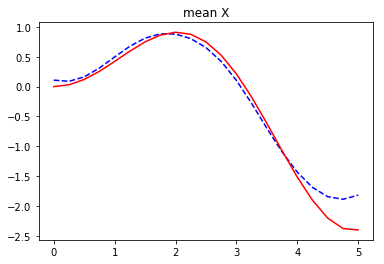

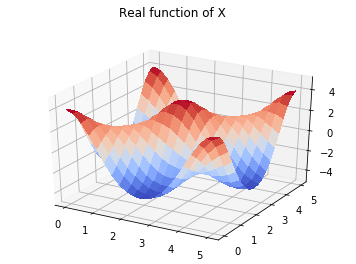

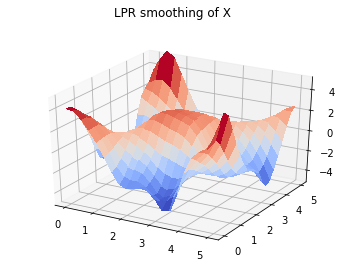

1.04880884817
1.0
1.04880884817


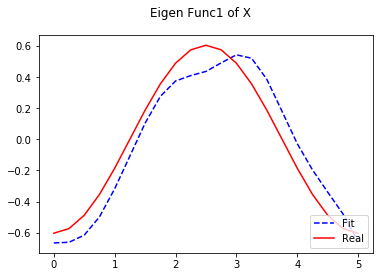

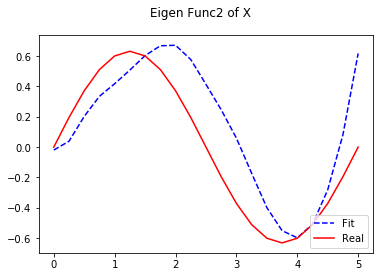

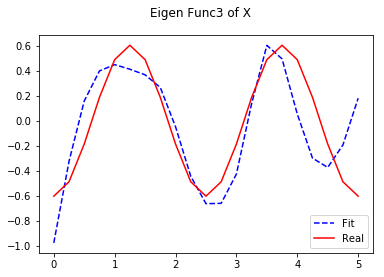

In [10]:
#------------------------
# Plot FPCA result of X
#------------------------

Plotting.Plot_FPCAResult(X_data, 
                         FpcaResult_X = result_X, 
                         Mean_Func = X_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_X, 
                          X_eigen_val = X_eigen_val,
                          adjust_sign_of_eigen = np.array([-1, 1, -1]), 
                          name_of_X = 'X', 
                          z_lim_of_cov = np.array([-5, 5]))

In [11]:
#fitting test sample
fit_test_X =result_X.Restruect_Fun(X_data.test_time_pts.reshape(test_samp_size, num_pts, 1),
                                     X_data.obs_test)[1]

fit_train_X =result_X.Restruect_Fun(X_data.tran_time_pts.reshape(tran_samp_size, num_pts, 1),
                                     X_data.obs_tran)[1]

D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [12]:
'''
Results of Y
'''

'\nResults of Y\n'

In [13]:
Y_candidate_h_mean = np.arange(0.15, 1, 0.05).reshape(-1, 1)
Y_candidate_h_cov = np.arange(0.1, 0.5, 0.05).repeat(2).reshape(-1, 2)

In [14]:
#------------------------
# Get FPCA result of Y
#------------------------
result_Y = FFReg.Fit_Mean_and_Cov(Y_data, Y_candidate_h_mean, 
                                  Y_candidate_h_cov, ker_fun = 'Gaussian')
print(result_Y)

D:\Program\Miniconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Number of grid: 21
Number of random function: 200
Bandwidth of mean: [0.3]
Bandwidth of cov: [0.25, 0.25]


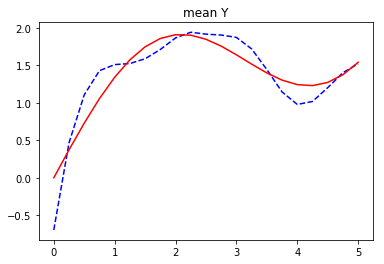

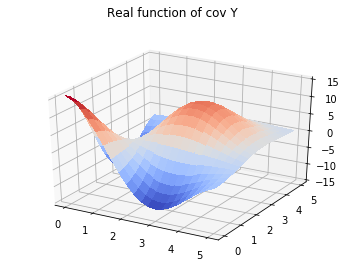

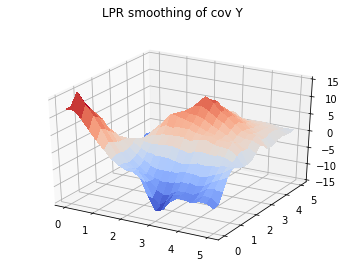

In [15]:
#------------------------
# Plot FPCA result of Y
#------------------------

Plotting.Plot_FPCAResult(Y_data, 
                         FpcaResult_X = result_Y, 
                         Mean_Func = Y_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_Y, 
                         X_eigen_val = None,
                         adjust_sign_of_eigen = None, 
                         name_of_X = 'Y', 
                         z_lim_of_cov = np.array([-15, 15]),
                         response = True)

In [16]:
'''
Construct Coefficient Function

    1. fit cov_Xi_Xj
    2. fit cov_Xi_Y
    3. combine them to build coefficient function
    
'''

'\nConstruct Coefficient Function\n\n    1. fit cov_Xi_Xj\n    2. fit cov_Xi_Y\n    3. combine them to build coefficient function\n    \n'

In [17]:
# bandwidth
X_Y_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.2, 0.8, 7), 
                                                 np.linspace(0.2, 0.6, 5))).T.reshape(-1,2)

In [18]:
fit_cov_XY = FFReg.Fit_Cov_XY(X_time_pts = X_data.tran_time_pts,
                                Y_time_pts = Y_data.tran_time_pts,
                                obs_X = X_data.obs_tran, 
                                obs_Y = Y_data.obs_tran,
                                X_time_grid = X_data.time_grid,
                                Y_time_grid = Y_data.time_grid, 
                                fit_X_mean = result_X.mean_fun, 
                                fit_Y_mean = result_Y.mean_fun, 
                                candidate_h_cov = X_Y_candidate_h_cov, 
                                ker_fun = 'Gaussian')

D:\Program\Miniconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2469: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
D:\Program\Miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:2470: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.4  0.4]


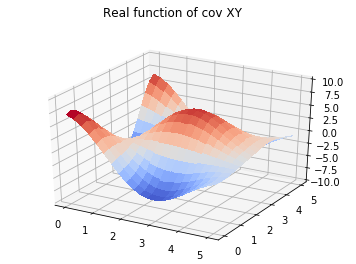

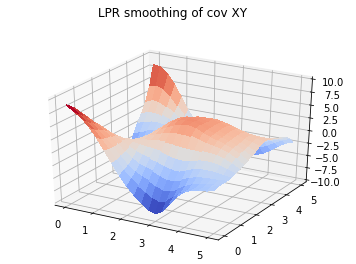

In [19]:
Plotting.Plot_Cov_XY(time_grid_X = X_data.time_grid,
                     time_grid_Y = Y_data.time_grid,
                     X_real_val_on_grid = X_data.real_val_on_grid,
                     Y_real_val_on_grid = Y_data.real_val_on_grid,
                     X_mean = X_Mean_Func(X_data.time_grid), 
                     Y_mean = Y_Mean_Func(Y_data.time_grid),
                     fitted_cov = fit_cov_XY, 
                     name_of_XY = 'XY', 
                     z_lim = np.array([-10, 10]))

In [20]:
'''
Coefficient Function
'''

'\nCoefficient Function\n'

In [21]:
#==========================================
# Get Block_cov_XX (combine all cov_Xi_Xj)
#==========================================

fit_cov_XX = result_X.cov_fun

In [22]:
real_cov_XX = FFReg.Real_Block_Cov_XX(list_time_grid_X = [X_data.time_grid],
                                          list_X_real_val_on_grid = [X_data.real_val_on_grid],
                                          list_X_Mean_Func = [X_Mean_Func])

[ 0 21]


In [23]:
inv_fit_cov_XX = np.linalg.pinv(fit_cov_XX, rcond= 0.1)
inv_real_cov_XX = np.linalg.pinv(real_cov_XX, rcond= 0.01)

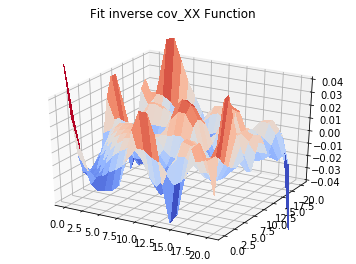

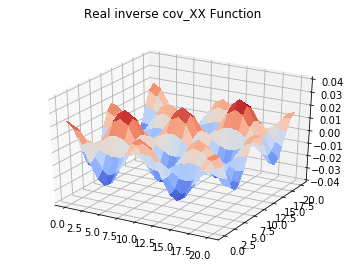

In [24]:
Plotting.Compare_Fit_and_Real(fit = inv_fit_cov_XX,
                              real = inv_real_cov_XX,
                              name = 'inverse cov_XX Function',
                              z_lim = 0.04 * np.array([-1, 1]))

In [25]:
# -----------------------------
# Compute Coefficient Function
# -----------------------------

fit_Beta_without_delta =  np.matmul(inv_fit_cov_XX,fit_cov_XY)

## add delta
delta = np.diag(np.repeat([X_data.time_grid[1] - X_data.time_grid[0]],
                           [num_grid_X]))

delta_inv = np.linalg.inv(delta)
fit_Beta  = np.matmul(delta_inv, fit_Beta_without_delta)

In [26]:
# -----------------------------
# Real Coefficient Function
# -----------------------------

real_block_eig_fun_X = FFReg.Real_Block_Eigen_Func(list_Eigen_Func = [Eigen_Funcs_X],
                                                   list_time_grid = [X_data.time_grid])

real_block_eig_fun_Y = FFReg.Real_Block_Eigen_Func(list_Eigen_Func = [Eigen_Funcs_Y],
                                                   list_time_grid = [Y_data.time_grid])

Real_coef_fun = np.matmul(np.matmul(real_block_eig_fun_X.T, B), 
                          real_block_eig_fun_Y)

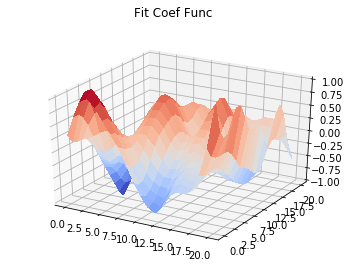

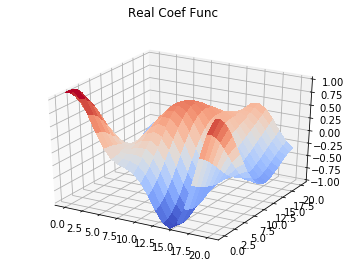

In [27]:
Plotting.Compare_Fit_and_Real(fit = fit_Beta,
                              real = Real_coef_fun,
                              name = "Coef Func",
                              z_lim = [-1, 1])

In [28]:
'''
1. Fit the Response on grid pts (for both training Y and test Y)
2. Plot the Result
'''

'\n1. Fit the Response on grid pts (for both training Y and test Y)\n2. Plot the Result\n'

In [29]:
#---------------------------------------
# fit Response of training set on grid
#---------------------------------------

fit_train_X_center = fit_train_X - result_X.mean_fun

In [30]:
#compute test_Y(on grid pts)
fit_train_Y = result_Y.mean_fun + np.matmul(fit_Beta_without_delta.T, fit_train_X_center.T).T

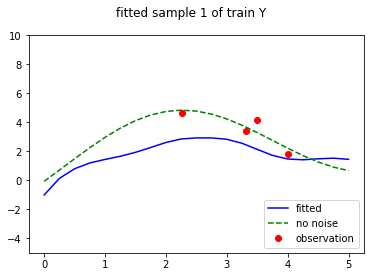

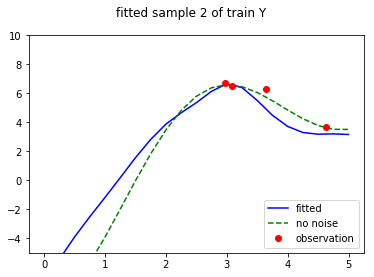

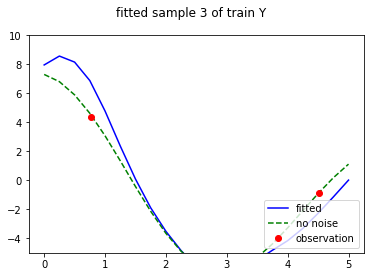

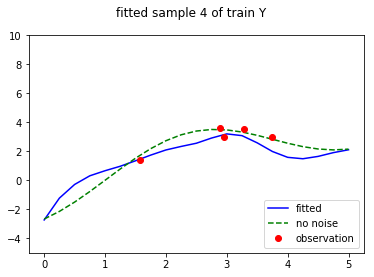

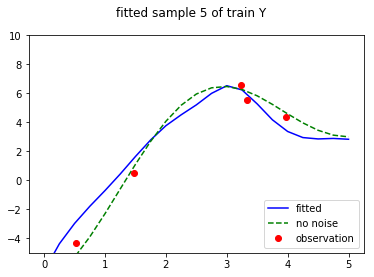

In [31]:
Plotting.Plot_Restruct_Funcs(fit_X = np.asarray(fit_train_Y),
                             real_X= Y_data.real_val_on_grid[: tran_samp_size],
                             time_grid = Y_data.time_grid,
                             obs_X= Y_data.obs_tran,
                             obs_time=Y_data.tran_time_pts,
                             name='train Y',
                             num_plot= 5,
                             y_lim= [-5,10])

In [32]:
#---------------------------------------
# fit Response of test set on grid
#---------------------------------------
fit_test_X_center = fit_test_X - result_X.mean_fun

In [33]:
#compute test_Y(on grid pts)
fit_test_Y = result_Y.mean_fun + np.matmul(fit_Beta_without_delta.T, fit_test_X_center.T).T

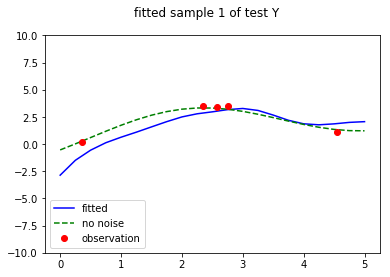

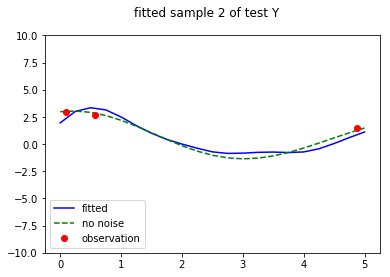

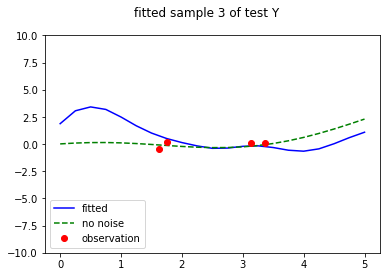

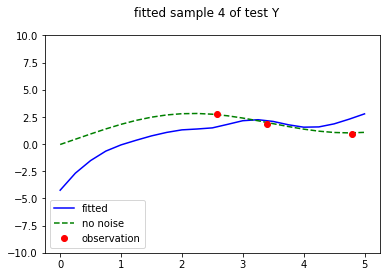

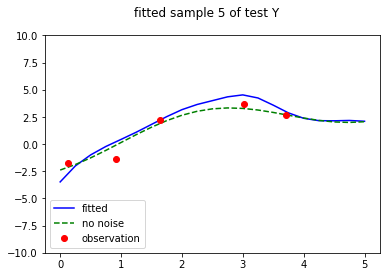

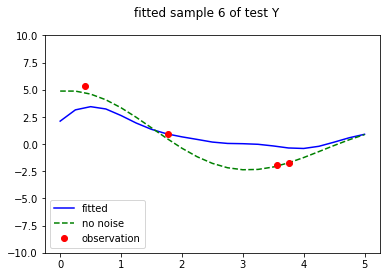

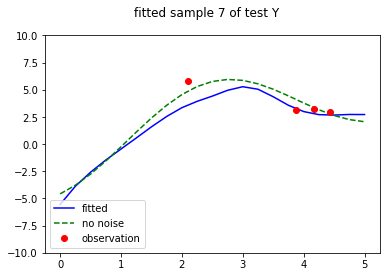

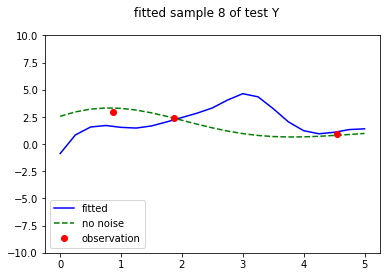

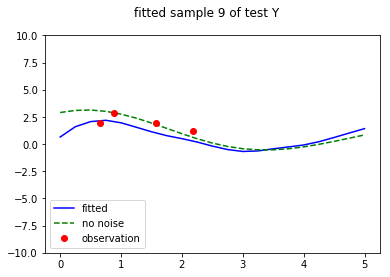

In [34]:
Plotting.Plot_Restruct_Funcs(fit_X = np.asarray(fit_test_Y),
                             real_X= Y_data.real_val_on_grid[tran_samp_size:],
                             time_grid = Y_data.time_grid,
                             obs_X= Y_data.obs_test,
                             obs_time=Y_data.test_time_pts,
                             name='test Y',
                             num_plot= 9,
                             y_lim= [-10,10]
                             ,legend_location = 3)

In [35]:
#real value of test_Y (on grid pts)
real_test_Y = Y_data.real_val_on_grid[tran_samp_size:,:]

In [36]:
#========================================================
#compute RMSPE (relative mean squared prediction error)
#========================================================

(np.square(real_test_Y - fit_test_Y)).sum() /(real_test_Y**2).sum() / test_samp_size

0.0015439880238740475

In [37]:
#======================================
#compute Mean integrated squared error
#======================================

np.sum(np.square(real_test_Y - fit_test_Y) * (Y_data.time_grid[1] - Y_data.time_grid[0]), 1).mean()

6.7420159302994254

In [38]:
# maxima of absolute error
np.abs(real_test_Y - fit_test_Y).max()

6.9190583544600699